# Real Estate Sales 2001-2020 GL

https://catalog.data.gov/dataset/real-estate-sales-2001-2018
https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2020-GL/5mzw-sjtu

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')

path_directory = os.getcwd()

# Import Dataset

In [3]:
file_path = os.path.join(path_directory, 'datasets', 'Real_Estate_Sales_2001-2020_GL.csv')

df = pd.read_csv(file_path)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.columns = [col.replace(' ', '_') for col in df.columns]                   # replace all spaces between column names with underscores
df.columns

Index(['Serial_Number', 'List_Year', 'Date_Recorded', 'Town', 'Address',
       'Assessed_Value', 'Sale_Amount', 'Sales_Ratio', 'Property_Type',
       'Residential_Type', 'Non_Use_Code', 'Assessor_Remarks', 'OPM_remarks',
       'Location'],
      dtype='object')

In [5]:
df.shape

(997213, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial_Number     997213 non-null  int64  
 1   List_Year         997213 non-null  int64  
 2   Date_Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed_Value    997213 non-null  float64
 6   Sale_Amount       997213 non-null  float64
 7   Sales_Ratio       997213 non-null  float64
 8   Property_Type     614767 non-null  object 
 9   Residential_Type  608904 non-null  object 
 10  Non_Use_Code      289681 non-null  object 
 11  Assessor_Remarks  149864 non-null  object 
 12  OPM_remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [7]:
df1 = df.drop(columns=['Serial_Number', 'Date_Recorded'])                      
df1.head()

,List_Year,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Non_Use_Code,Assessor_Remarks,OPM_remarks,Location
0,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,2020,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,2020,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,2020,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [8]:
df2 = df1.astype(
                  {
                   'List_Year': np.int64,
                   'Assessed_Value': np.number,
                   'Sale_Amount': np.number,
                   'Sales_Ratio': np.float64
                  }
                )

df2.dtypes.value_counts()

object     8
float64    3
int64      1
dtype: int64

In [9]:
df2.describe(exclude=np.number)

,Town,Address,Property_Type,Residential_Type,Non_Use_Code,Assessor_Remarks,OPM_remarks,Location
count,997213,997162,614767,608904,289681,149864,9934,197697
unique,170,714371,11,5,106,66508,4825,130529
top,Bridgeport,MULTI ADDRESSES,Single Family,Single Family,25 - Other,ESTATE SALE,GOOD SALE PER MLS,POINT (-72.36336 41.97461)
freq,34201,620,401612,445016,59916,5044,978,181


In [10]:
df2.describe(include=np.number).drop(columns=['List_Year'])

,Assessed_Value,Sale_Amount,Sales_Ratio
count,9.97213e+05,9.97213e+05,9.97213e+05
mean,2.79144e+05,3.91151e+05,1.04464e+01
std,1.67061e+06,5.34727e+06,1.89019e+03
min,0.00000e+00,0.00000e+00,0.00000e+00
25%,8.76000e+04,1.40000e+05,4.86700e-01
50%,1.38390e+05,2.25000e+05,6.24600e-01
75%,2.25560e+05,3.65000e+05,7.85276e-01
max,8.81510e+08,5.00000e+09,1.22642e+06


# Helper Functions For Plotting

In [11]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter functions
def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


# bar plot helper function
def plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    '''Barplot helper function'''
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(data=data, x=x, y=y, ci=None, hue=hue, palette=palette, ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar

# Grouping and Aggregation

In [12]:
# calculate the sales amount for different property type in each town for 2007
df2.query("List_Year == 2007")\
   .groupby(['Town', 'Property_Type'])\
   .agg(['min', 'mean', 'max', 'sum'])['Sale_Amount']\
   .head()

min          mean        max          sum
Town          Property_Type                                                
***Unknown*** Single Family  282450.0  282450.00000   282450.0  2.82450e+05
Andover       Single Family  148000.0  285781.94444   595000.0  1.02882e+07
Avon          Condo            9000.0  292596.39175   960000.0  2.83818e+07
              Single Family    2500.0  567118.49541  3042839.0  1.23632e+08
Barkhamsted   Single Family   15000.0  261654.78947   454900.0  9.94288e+06

In [13]:
# calculate the sales amount for different property type in each town for 2020
df2.query("List_Year == 2020")\
   .groupby(['Town', 'Property_Type'])\
   .agg(['min', 'mean', 'max', 'sum'])['Sale_Amount']\
   .head()

min          mean       max         sum
Town    Property_Type                                              
Andover Residential     69000.0  313701.13115  995000.0  19135769.0
        Vacant Land     41500.0  122395.57143  310000.0    856769.0
Ansonia Apartments     380000.0  490000.00000  600000.0    980000.0
        Commercial      75000.0  336875.00000  685000.0   2695000.0
        Industrial     550000.0  550000.00000  550000.0    550000.0

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

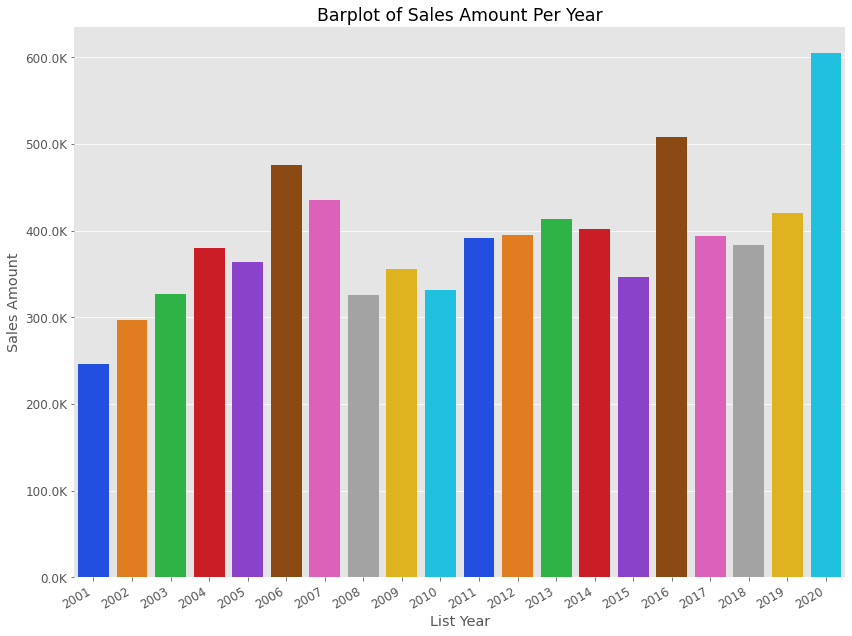

In [14]:
plot_bar(
    data=df2,
    x='List_Year', y='Sale_Amount', palette='bright',
    title='Barplot of Sales Amount Per Year', xlabel='List Year', ylabel='Sales Amount',
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

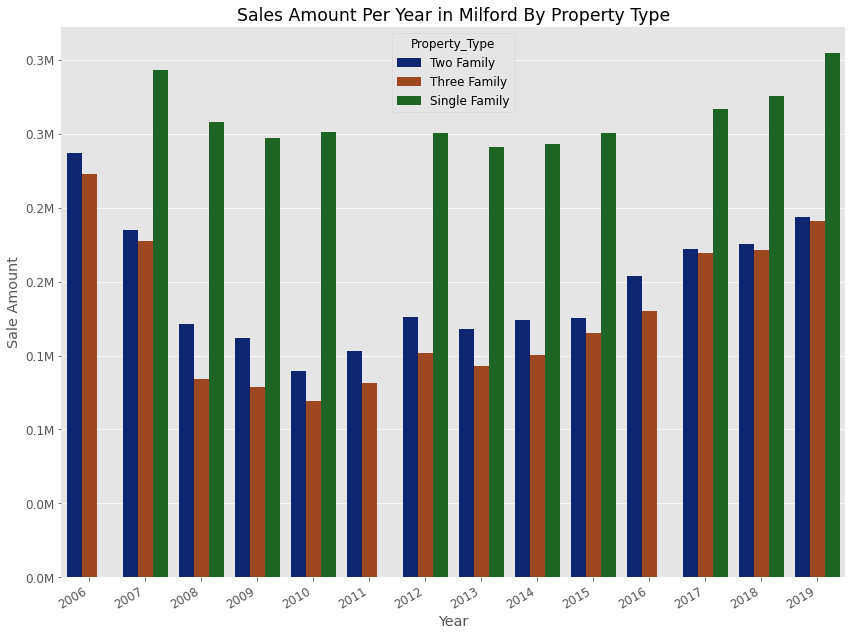

In [15]:
plot_bar(
  data=df2.query("Town == 'Milford' & Property_Type == 'Single Family' | Property_Type == 'Two Family' | Property_Type == 'Three Family'"), 
  x='List_Year', y='Sale_Amount', 
  hue='Property_Type', palette='dark',
  formatter=format_mill,
  xlabel='Year', ylabel='Sale Amount', title='Sales Amount Per Year in Milford By Property Type'
)

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

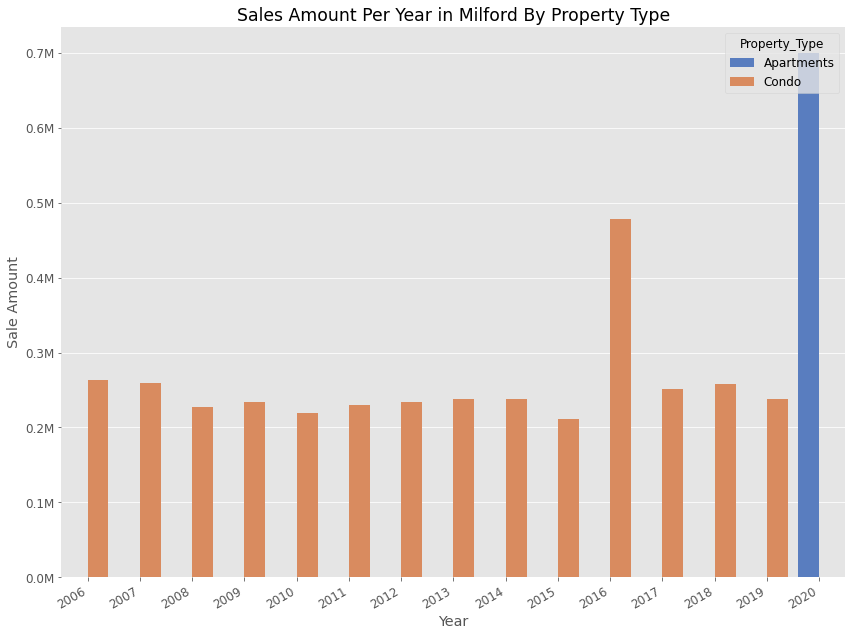

In [16]:
plot_bar(
  data=df2.query("Town == 'Milford' & Property_Type == 'Apartments' | Property_Type == 'Condo'"), 
  x='List_Year', y='Sale_Amount', 
  hue='Property_Type', palette='muted',
  formatter=format_mill,
  xlabel='Year', ylabel='Sale Amount', title='Sales Amount Per Year in Milford By Property Type'
)

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

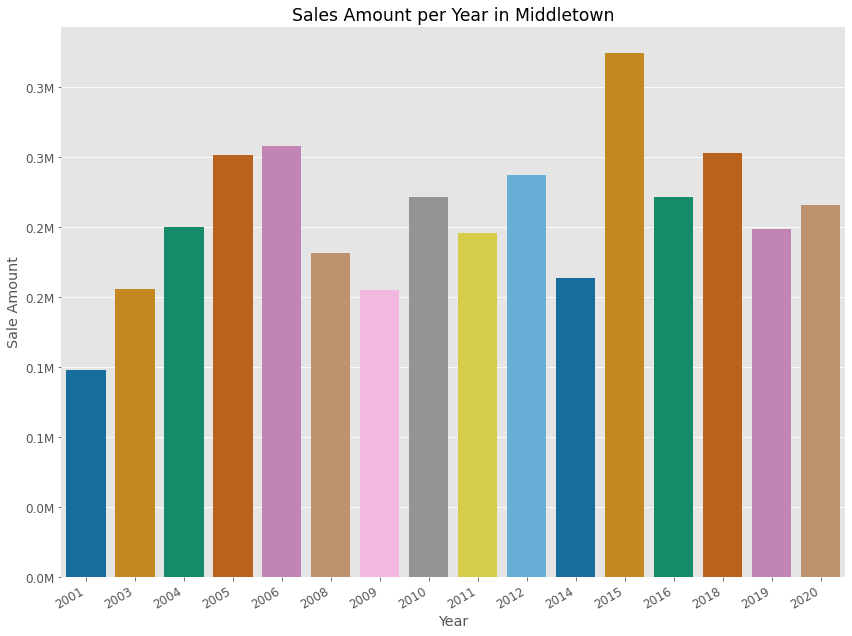

In [17]:
plot_bar(
  data=df2.query("Town == 'Middletown'"), 
  x='List_Year', y='Sale_Amount', 
  palette='colorblind',
  formatter=format_mill,
  xlabel='Year', ylabel='Sale Amount', title='Sales Amount per Year in Middletown'
)

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

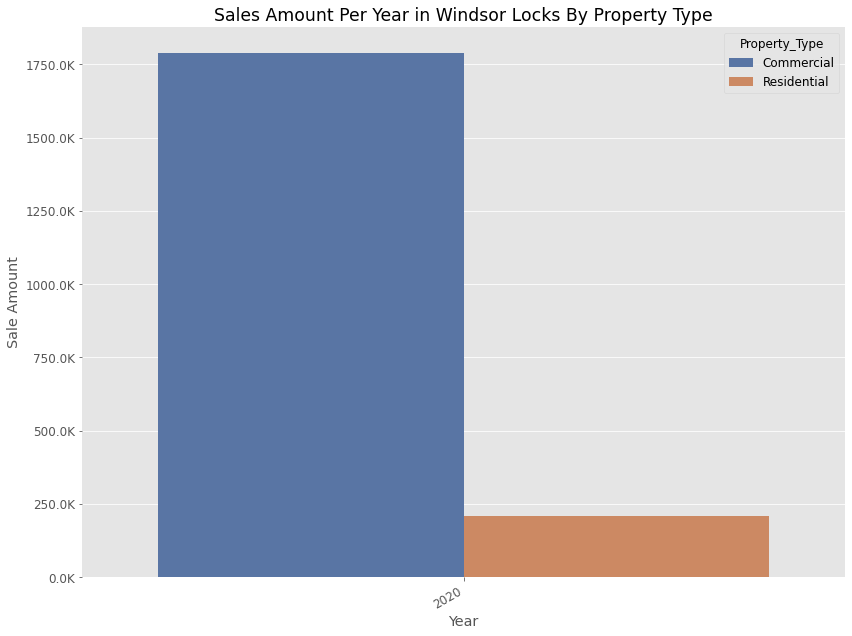

In [18]:
plot_bar(
  data=df2.query("Town == 'Windsor Locks' & Property_Type == 'Residential' | Property_Type == 'Commercial'"), 
  x='List_Year', y='Sale_Amount', 
  hue='Property_Type', palette='deep',
  formatter=format_tsd,
  xlabel='Year', ylabel='Sale Amount', title='Sales Amount Per Year in Windsor Locks By Property Type'
)

<function __main__.plot_bar(data, x, y, hue=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

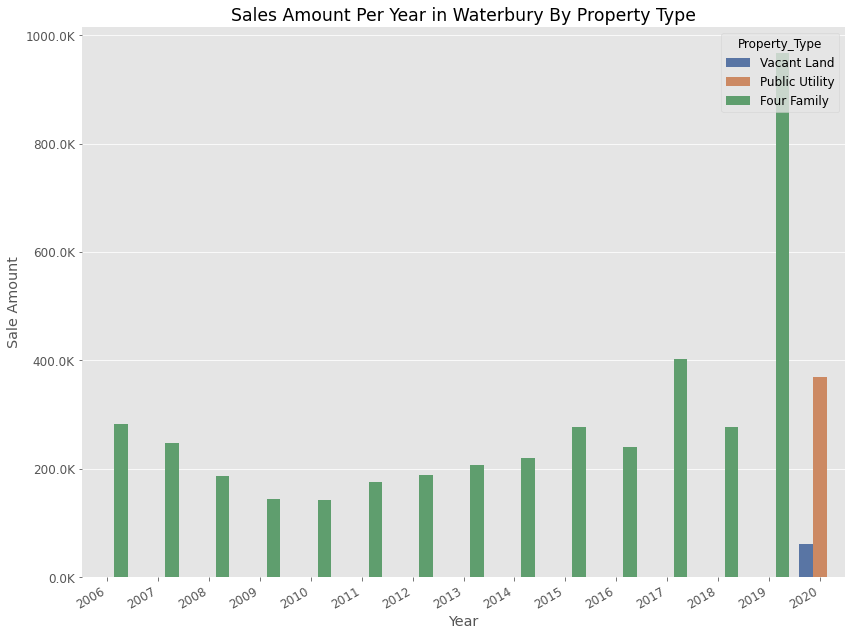

In [19]:
plot_bar(
  data=df2.query("Town == 'Waterbury' & Property_Type == 'Vacant Land' | Property_Type == 'Public Utility' | Property_Type == 'Four Family'"), 
  x='List_Year', y='Sale_Amount', 
  hue='Property_Type', palette='deep',
  formatter=format_tsd,
  xlabel='Year', ylabel='Sale Amount', title='Sales Amount Per Year in Waterbury By Property Type'
)